## Exercício 2 de Análise de Componentes Independentes


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro
import librosa
from librosa.display import waveplot, specshow
import IPython.display as ipd
from scipy.fftpack import fft, ifft

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS


In [2]:
learning_rate = 1e-6

In [3]:
folderPath = 'E:\\OneDrive\\Documentos\\UFRJ\\Mestrado\\PEE\\ICA\\Audio\\Linear'
filePath = folderPath + '\\X1.wav'

[X1, fs] = librosa.core.load(folderPath+'\\X1.wav', sr = 44100)
[X2, fs] = librosa.core.load(folderPath+'\\X2.wav', sr = 44100)
[X3, fs] = librosa.core.load(folderPath+'\\X3.wav', sr = 44100)
[X4, fs] = librosa.core.load(folderPath+'\\X4.wav', sr = 44100)

mixture1 = np.reshape(X1, (1,-1))
mixture2 = np.reshape(X2, (1,-1))
mixture3 = np.reshape(X3, (1,-1))
mixture4 = np.reshape(X4, (1,-1))

mixtures = np.concatenate([mixture1, mixture2, mixture3, mixture4], axis = 0)
print(mixtures.shape)
mixtures_FFT = fft(mixtures)

(4, 9052160)


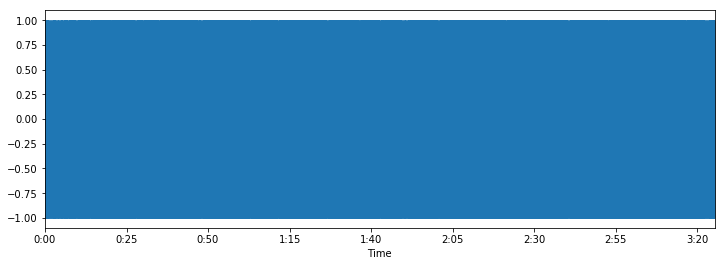

In [4]:
plt.figure(figsize=(12, 4))
waveplot(X1.T, sr=fs)
ipd.Audio(X1[:fs*3], rate=fs) 

In [5]:
#[yNPCA, W] = NPCA_RLS(mixtures, 1e-6)
[yNPCA_FFT, WNPCA] = NPCA_RLS(mixtures_FFT, runs  = 2)

E:\OneDrive\Documentos\UFRJ\Mestrado\PEE\ICA\funcoes\ICAfunctions.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:,i] = np.dot(W, whitenedMixtures[:,i])


In [6]:
yNPCA = ifft(np.dot(WNPCA, mixtures_FFT))
resultsTable(yNPCA[:,fs*20:fs*20+5000])
plot_MutualInformation(mixtures, yNPCA)

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1321: ComplexWarning: Casting complex values to real discards the imaginary part
  a, w, pw, ifault = statlib.swilk(y, a[:N//2], init)
E:\OneDrive\Documentos\UFRJ\Mestrado\PEE\ICA\funcoes\evaluation.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  size = len(x)), bins = 'fd')[0])


TypeError: ufunc 'ceil' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
ipd.display(ipd.Audio(yNPCA[0][fs*10:fs*20], rate=fs))
ipd.display(ipd.Audio(yNPCA[1][fs*10:fs*20], rate=fs))

In [ ]:
ipd.display(ipd.Audio(yNPCA[2][fs*10:fs*20], rate=fs))
ipd.display(ipd.Audio(yNPCA[3][fs*10:fs*20], rate=fs))

In [ ]:
[yBACK, W] = cichocki_Feedback(mixtures, learning_rate)

In [ ]:
resultsTable(yBACK[:,fs*20:fs*20+5000])

In [ ]:
ipd.display(ipd.Audio(yBACK[0][fs*10:fs*20], rate=fs))
ipd.display(ipd.Audio(yBACK[1][fs*10:fs*20], rate=fs))

In [ ]:
ipd.display(ipd.Audio(yBACK[2][fs*10:fs*20], rate=fs))
ipd.display(ipd.Audio(yBACK[3][fs*10:fs*20], rate=fs))

In [ ]:
[yForward, W] = cichocki_Feedforward(mixtures, learning_rate)

In [ ]:
resultsTable(yForward[:,fs*20:fs*20+5000])

In [ ]:
ipd.display(ipd.Audio(yForward[0][fs*10:fs*20], rate=fs))
ipd.display(ipd.Audio(yForward[1][fs*10:fs*20], rate=fs))

In [ ]:
ipd.display(ipd.Audio(yForward[2][fs*10:fs*20], rate=fs))
ipd.display(ipd.Audio(yForward[3][fs*10:fs*20], rate=fs))